In [1]:
!pwd

/Users/beszabo/bene/szakdolgozat/code


In [2]:
import os
import numpy as np
import pandas as pd
from lead_lag_normalized import add_normalizations, event_study_value # Assuming lead_lag_normalized.py is in 'code'
import matplotlib.pyplot as plt
from lead_lag_analysis import xcorr_by_company, plot_xcorr, event_study, plot_event
from lead_lag_normalized import event_study_value # Import event_study_value


In [ ]:

REPO_ROOT = "/Users/beszabo/bene/topicality-online"
DERIVED_DIR = os.path.join(REPO_ROOT, "data", "derived")
FIG_DIR = os.path.join(REPO_ROOT, "figures")

DERIVED_DIR = os.path.join(REPO_ROOT, "data", "derived")
PANEL_CSV = os.path.join(DERIVED_DIR, "company_weekly_panel.csv") # Load the correct file

panel = pd.read_csv(PANEL_CSV, parse_dates=['week_start'])
panel = add_normalizations(panel, monthly=False) #

pos_z, neg_z = event_study_value(panel, pos_feature='mean_pos', neg_feature='mean_neg', value_col='num_memes_z', window=3)
os.makedirs(FIG_DIR, exist_ok=True)

In [5]:
# Cross-correlations
for feat in ['sentiment_score', 'mean_pos', 'mean_neg', 'non_neutral_share', 'num_articles']:
    df = xcorr_by_company(panel, feat, max_lag=4)
    out = os.path.join(FIG_DIR, f'xcorr_{feat}_normalized_panel2.png') # Changed filename
    plot_xcorr(df, f'Lead-Lag: {feat} vs num_memes_z', out)
    print(f'Saved {out}')

# # Event study for non-normalized data (original from lead_lag_analysis.py)
# df_pos, df_neg = event_study(panel, pos_feature='mean_pos', neg_feature='mean_neg', window=3)
# plot_event(df_pos, 'meme_spike', 'Event: Positive news vs meme_spike (raw)', os.path.join(FIG_DIR, 'event_pos_meme_spike_raw.png'))
# plot_event(df_neg, 'meme_spike', 'Event: Negative news vs meme_spike (raw)', os.path.join(FIG_DIR, 'event_neg_meme_spike_raw.png'))
# plot_event(df_pos, 'num_memes', 'Event: Positive news vs num_memes (raw)', os.path.join(FIG_DIR, 'event_pos_num_memes_raw.png'))
# plot_event(df_neg, 'num_memes', 'Event: Negative news vs num_memes (raw)', os.path.join(FIG_DIR, 'event_neg_num_memes_raw.png'))

# Z-score event study
pos_z, neg_z = event_study_value(panel, pos_feature='mean_pos', neg_feature='mean_neg', value_col='num_memes_z', window=3)
plot_event(pos_z, 'num_memes_z', 'Event: Positive news vs normalized (z) meme volume', os.path.join(FIG_DIR, 'event_pos_num_memes_z.png'))
plot_event(neg_z, 'num_memes_z', 'Event: Negative news vs normalized (z) meme volume', os.path.join(FIG_DIR, 'event_neg_num_memes_z.png'))


# # Rolling baseline ratio event study
# pos_r, neg_r = event_study_value(panel, pos_feature='mean_pos', neg_feature='mean_neg', value_col='num_memes_rel', window=3)
# plot_event(pos_r, 'num_memes_rel', 'Event: Positive news vs relative meme volume', os.path.join(FIG_DIR, 'event_pos_num_memes_rel.png'))
# plot_event(neg_r, 'num_memes_rel', 'Event: Negative news vs relative meme volume', os.path.join(FIG_DIR, 'event_neg_num_memes_rel.png'))

# print('Event-study plots saved.')

/Users/beszabo/bene/topicality-online/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/beszabo/bene/topicality-online/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/beszabo/bene/topicality-online/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/beszabo/bene/topicality-online/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/beszabo/bene/topicality-online/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/beszabo/bene/topicality-online/.venv/lib/python3.13/site-p

Saved /Users/beszabo/bene/topicality-online/figures/xcorr_sentiment_score_normalized_panel2.png
Saved /Users/beszabo/bene/topicality-online/figures/xcorr_mean_pos_normalized_panel2.png
Saved /Users/beszabo/bene/topicality-online/figures/xcorr_mean_neg_normalized_panel2.png
Saved /Users/beszabo/bene/topicality-online/figures/xcorr_non_neutral_share_normalized_panel2.png


/Users/beszabo/bene/topicality-online/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/beszabo/bene/topicality-online/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/beszabo/bene/topicality-online/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/beszabo/bene/topicality-online/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/beszabo/bene/topicality-online/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/beszabo/bene/topicality-online/.venv/lib/python3.13/site-p

Saved /Users/beszabo/bene/topicality-online/figures/xcorr_num_articles_normalized_panel2.png


Loaded 3942 monthly company-month records


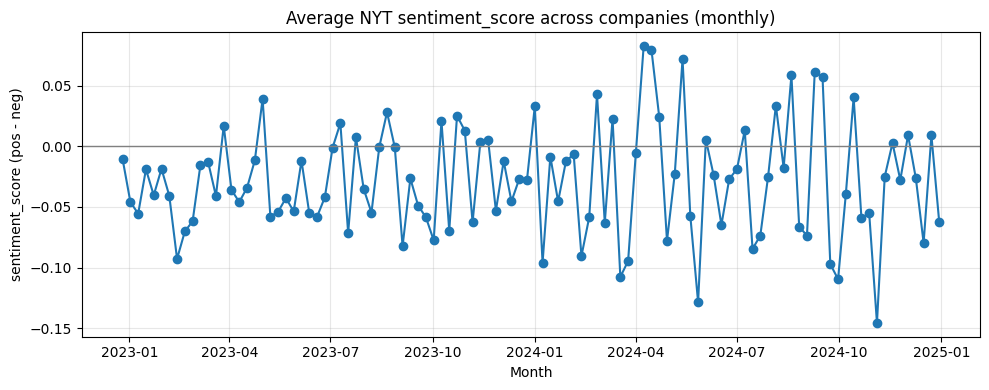

In [4]:
# --- Monthly NYT sentiment quick overview ---
import pandas as pd
import matplotlib.pyplot as plt

NYT_CSV = "/Users/beszabo/bene/topicality-online/data/derived/nyt_weekly_sentiment.csv"
nyt_month = pd.read_csv(NYT_CSV, parse_dates=["week_start"])
print("Loaded", len(nyt_month), "monthly company-month records")

# Aggregate across companies to see overall trend
monthly_avg = nyt_month.groupby("week_start")["sentiment_score"].mean()
plt.figure(figsize=(10,4))
plt.plot(monthly_avg.index, monthly_avg.values, marker="o")
plt.title("Average NYT sentiment_score across companies (monthly)")
plt.ylabel("sentiment_score (pos - neg)")
plt.xlabel("Month")
plt.axhline(0, color="gray", lw=1)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [3]:
# --- Z-score event study on monthly panel ---
from lead_lag_normalized import event_study_value, add_normalizations

PANEL_MONTHLY = os.path.join(DERIVED_DIR, "company_monthly_panel.csv")
panel_m = pd.read_csv(PANEL_MONTHLY, parse_dates=["month_start"])
panel_m = add_normalizations(panel_m, monthly=True)

# Compute event windows where positive / negative sentiment events are top 10 % of their distribution
pos_z_m, neg_z_m = event_study_value(panel_m,
                                     pos_feature="mean_pos",
                                     neg_feature="mean_neg",
                                     value_col="num_memes_z",
                                     window=3,
                                     monthly=True)
plot_event(pos_z_m, "num_memes_z",
           "Event (monthly): Positive news vs normalized meme volume",
           os.path.join(FIG_DIR, "event_pos_num_memes_z_monthly.png"))
plot_event(neg_z_m, "num_memes_z",
           "Event (monthly): Negative news vs normalized meme volume",
           os.path.join(FIG_DIR, "event_neg_num_memes_z_monthly.png"))
print("Monthly z-score event-study plots saved.")

df_pos, df_neg = event_study(panel_m, pos_feature='mean_pos', neg_feature='mean_neg', window=3)
plot_event(df_pos, 'meme_spike', 'Event: Positive news vs meme_spike (raw)', os.path.join(FIG_DIR, 'event_pos_meme_spike_raw_monthly.png'))
plot_event(df_neg, 'meme_spike', 'Event: Negative news vs meme_spike (raw)', os.path.join(FIG_DIR, 'event_neg_meme_spike_raw_monthly.png'))

Monthly z-score event-study plots saved.


KeyError: 'week_start'

In [9]:
! uv add U transformers
! python - <<'PY' /
from huggingface_hub import snapshot_download
snapshot_download("yuval-pinter/visual-sentiment-clip",
                  local_dir="models/visual-sentiment",
                  repo_type="model", revision="main")
PY

Resolved 141 packages in 1.97s                                       
Prepared 1 package in 279ms                                              ⠋ Preparing packages... (0/0)                                                   
Installed 1 package in 3ms                                  
 + u==1.0.4


RepositoryNotFoundError: 401 Client Error. (Request ID: Root=1-69088a0f-170f37d2192295361d114445;b9ed3d5e-6acd-4405-b3c8-6c67879d6057)

Repository Not Found for url: https://huggingface.co/api/models/yuval-pinter/visual-sentiment-clip/revision/main.
Please make sure you specified the correct `repo_id` and `repo_type`.
If you are trying to access a private or gated repo, make sure you are authenticated. For more details, see https://huggingface.co/docs/huggingface_hub/authentication
Invalid username or password.

In [ ]:
from PIL import Image
import torch, torch.nn.functional as F
from transformers import CLIPProcessor, CLIPModel

model_id = "victorandrees/visual-sentiment"
proc   = CLIPProcessor.from_pretrained(model_id)
model  = CLIPModel.from_pretrained(model_id)

def img_sentiment(path):
    img = Image.open(path).convert("RGB")
    inputs = proc(text=["negative", "positive"], images=img,
                  return_tensors="pt", padding=True)
    with torch.no_grad():
        logits = model(**inputs).logits_per_image.squeeze()   # [neg,pos]
    probs = F.softmax(logits, dim=0).tolist()
    return {"neg": probs[0], "pos": probs[1], "score": probs[1]-probs[0]}
print(img_sentiment("data/prediction_images/adidas/meme_submissions_1487127.png"))



OSError: victorandrees/visual-sentiment is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `hf auth login` or by passing `token=<your_token>`